# Simple Neural Network Music Genre Classification:

This notebook is dedicated to improving the test accuracy of the network presented in:
https://www.kaggle.com/code/aasimahmed04/music-genre-classifier

In [1]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
import tensorflow.keras as keras
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import librosa, IPython
import librosa.display as lplt

from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from keras import regularizers

import IPython.display as ipd
from IPython.display import Audio

### Labels are base on the following mapping:

In [2]:
map_ = {
    "blues"     : 0,
    "classical" : 1,
    "country"   : 2,
    "disco"     : 3,
    "hiphop"    : 4,
    "jazz"      : 5,
    "metal"     : 6,
    "pop"       : 7,
    "reggae"    : 8,
    "rock"      : 9,
}

### Load Data

In [3]:
csv_file_path = 'vggish_features_labels_3_sec_extended.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Separate features (X) and labels (y)
X = df.drop(columns=['label']).values  # Drop the 'label' column to get features
y = df['label'].values  # Get the 'label' column for labels

# Convert to appropriate data types
X = X.astype(np.float32)
y = y.astype(np.int32)

In [4]:
# Split into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,shuffle=True)

In [5]:
print("Train data size: ", X_train.shape);
print("Validation data size: ",X_val.shape);
print("Test data size: ", X_test.shape);

Train data size:  (6792, 128)
Validation data size:  (1699, 128)
Test data size:  (1499, 128)


In [6]:
# Build a simple classifier on top of VGGish features
model = Sequential() 
  
model.add(Flatten(input_shape=(X_train.shape[1],))) 
model.add(Dense(128,kernel_regularizer=regularizers.l2(0.0005), activation='relu')) 
model.add(BatchNormalization())
model.add(Dense(32,kernel_regularizer=regularizers.l2(0.005), activation='relu')) 
model.add(Dropout(0.3))  
model.add(Dense(10, activation='softmax')) 

model.summary()

C:\Users\420\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,482 (83.91 KB)

 Trainable params: 21,226 (82.91 KB)

 Non-trainable params: 256 (1.00 KB)

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5029 - loss: 1.7941 - val_accuracy: 0.7569 - val_loss: 1.1754
Epoch 2/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7597 - loss: 1.0070 - val_accuracy: 0.7999 - val_loss: 0.8422
Epoch 3/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7778 - loss: 0.9100 - val_accuracy: 0.8205 - val_loss: 0.7741
Epoch 4/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.8080 - val_accuracy: 0.8264 - val_loss: 0.6928
Epoch 5/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8096 - loss: 0.7754 - val_accuracy: 0.8228 - val_loss: 0.6984
Epoch 6/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8230 - loss: 0.7071 - val_accuracy: 0.8476 - val_loss: 0.6371
Epoch 7/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8330 - loss: 0.6682 - val_accuracy: 0.8405 - val_loss: 0.6196
Epoch 8/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8204 - loss: 0.6729 - val_accu

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9030 - loss: 0.3770 - val_accuracy: 0.8546 - val_loss: 0.5357
Epoch 52/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8957 - loss: 0.4031 - val_accuracy: 0.8729 - val_loss: 0.5122
Epoch 53/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8983 - loss: 0.3892 - val_accuracy: 0.8723 - val_loss: 0.5076
Epoch 54/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9013 - loss: 0.3973 - val_accuracy: 0.8729 - val_loss: 0.4954
Epoch 55/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9101 - loss: 0.3631 - val_accuracy: 0.8793 - val_loss: 0.4764
Epoch 56/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9054 - loss: 0.3796 - val_accuracy: 0.8670 - val_loss: 0.5117
Epoch 57/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8972 - loss: 0.3907 - val_accuracy: 0.8676 - val_loss: 0.5066
Epoch 58/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9127 - loss: 0.3530 - val_accuracy:

In [8]:
y_predict = np.argmax(model.predict(X_test),axis=1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [9]:
acc = np.mean(y_predict == y_test)*100
print("test accuracy = %.2f"%acc, "%");

test accuracy = 87.99 %


#### Confusion Matrix

In [10]:
cm = confusion_matrix(y_test, y_predict);

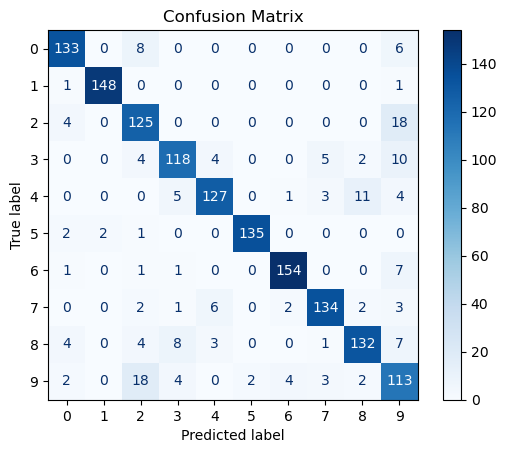

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")

plt.title('Confusion Matrix')
plt.show()